In [1]:
import sys
import numpy as np
import json

from lib.rnn import load_weights, pred
from lib.evalutil import peaks, accuracies, show_spec, show_wave

In [2]:
# load model
with open("configs/eval.json") as f:
    config = json.load(f)

In [3]:
config["weights"]

{'train_date': '20191201-154857', 'fold': 1, 'epoch': 20}

In [4]:
weights = load_weights(**config["weights"])

In [5]:
for w in weights:
    print(w.shape)

(1025, 200)
(200, 200)
(200,)
(200, 3)
(3,)


In [6]:
feature_date = config["feature_date"]

In [7]:
feature_date

'20191130-211656'

In [8]:
import matplotlib.pyplot as plt
def plot(Y):

    plt.figure(figsize=(24, 8))
    plt.title("HH")
    plt.plot(Y[:,0], color="b")
    
    plt.figure(figsize=(24, 8))
    plt.title("SD")
    plt.plot(Y[:,1], color="g")
    
    plt.figure(figsize=(24, 8))
    plt.title("KD")
    plt.plot(Y[:,2], color="r")

In [9]:
# load test data
X_test_dict = np.load(f"features/{feature_date}/X_test.npy", allow_pickle=True)[()]
Y_test_dict = np.load(f"features/{feature_date}/Y_test.npy", allow_pickle=True)[()]

X_test = X_test_dict["RealDrum01_01"]
Y_test = Y_test_dict["RealDrum01_01"]

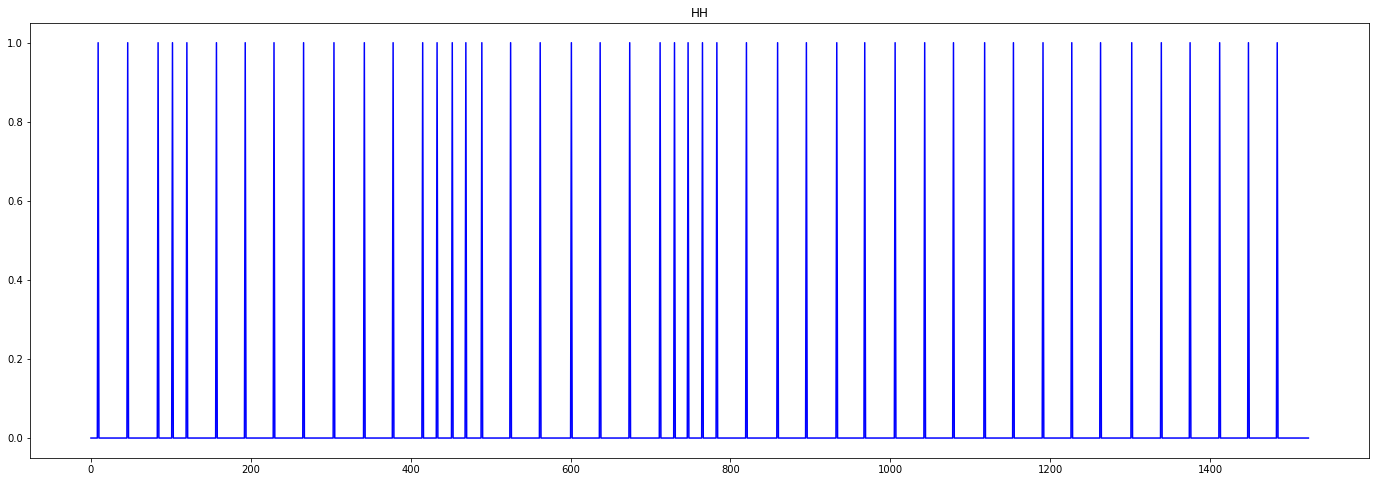

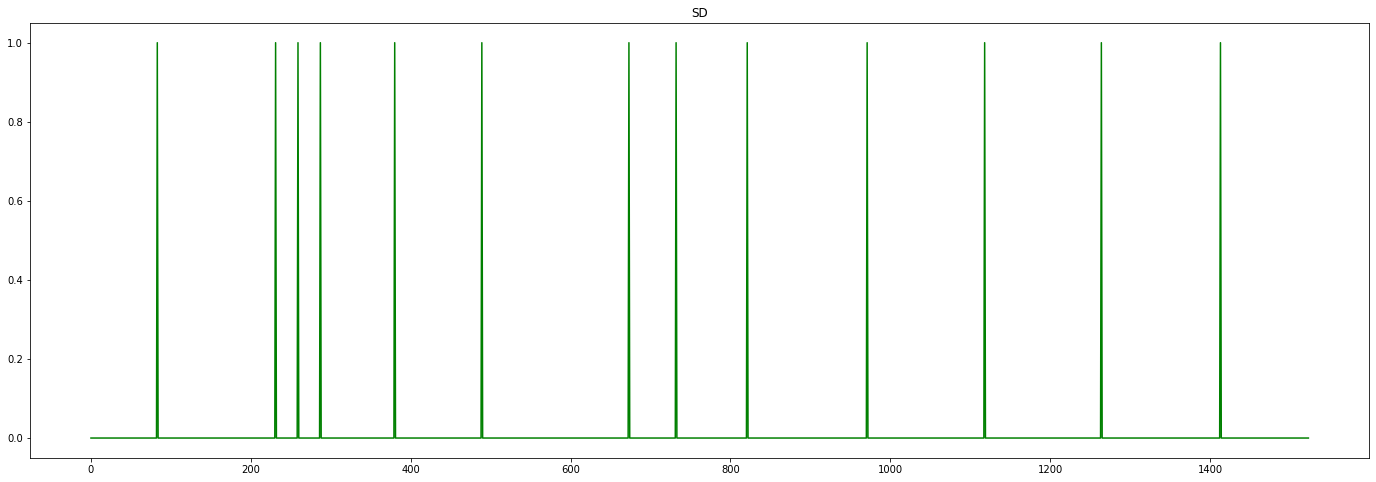

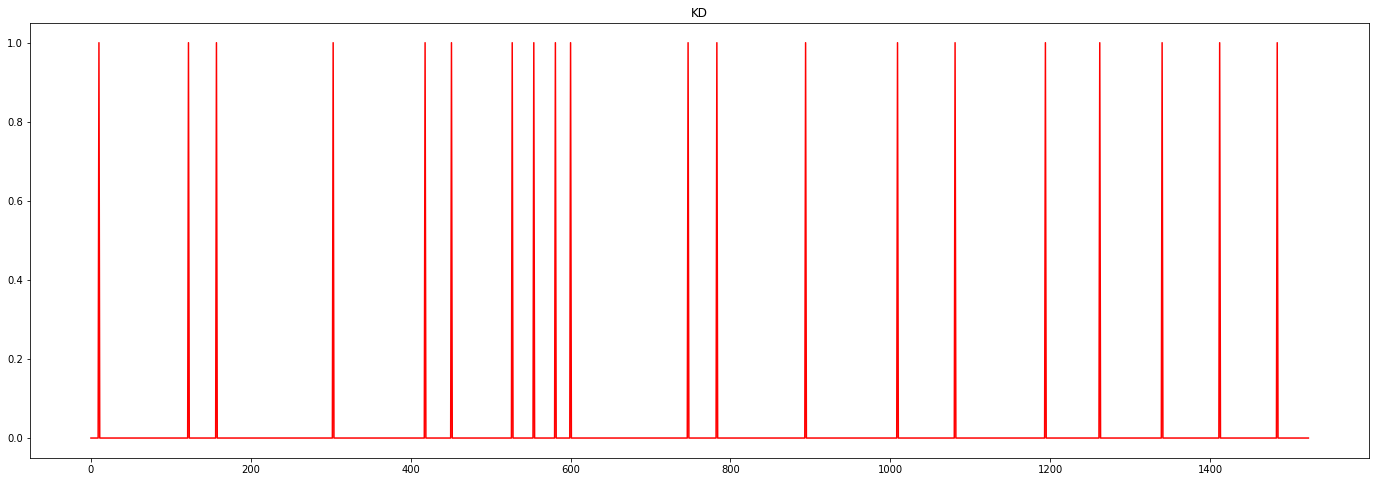

In [10]:
plot(Y_test)

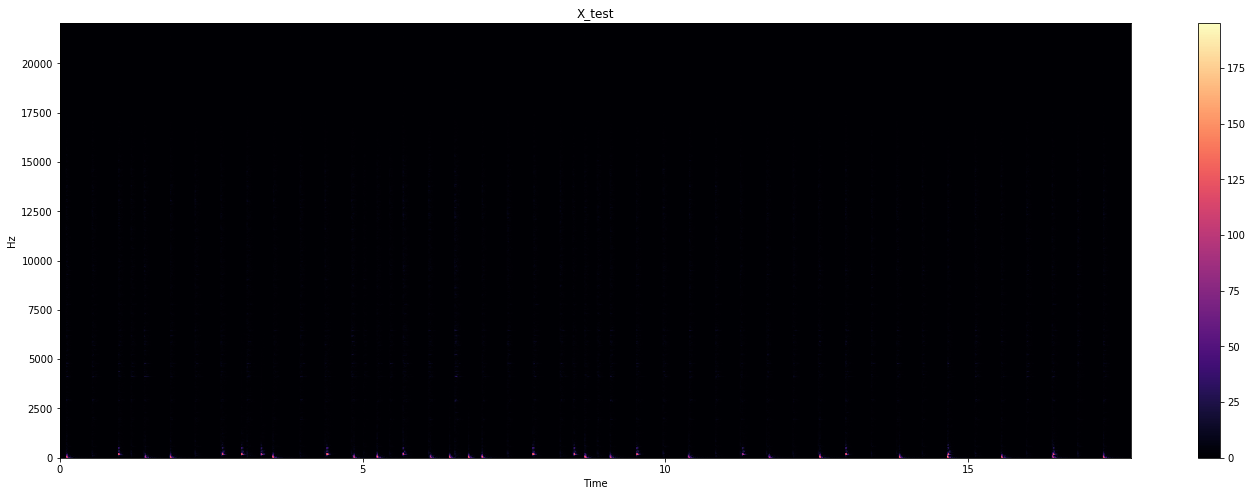

In [11]:
show_spec(X_test, "X_test")

In [12]:
Y_test.shape

(1524, 3)

In [13]:
Y_pred = pred(X_test, *weights)

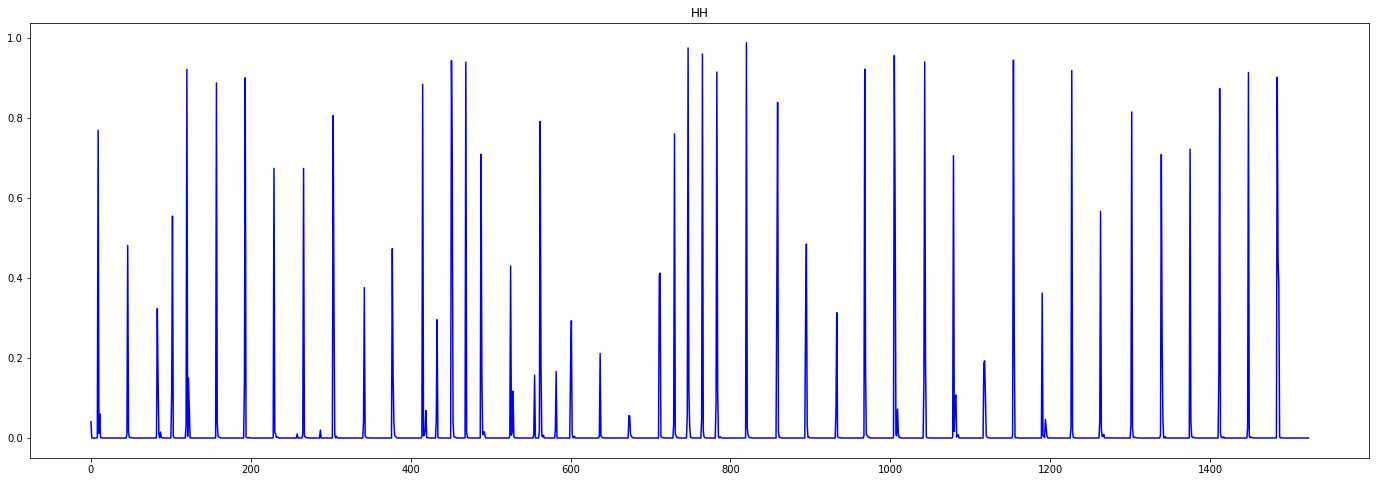

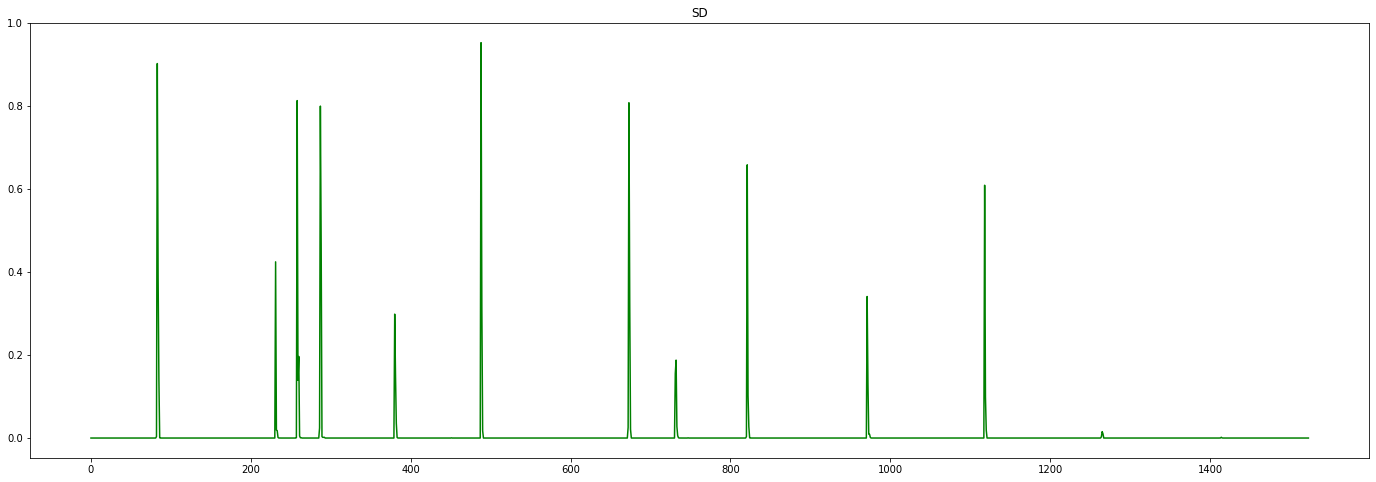

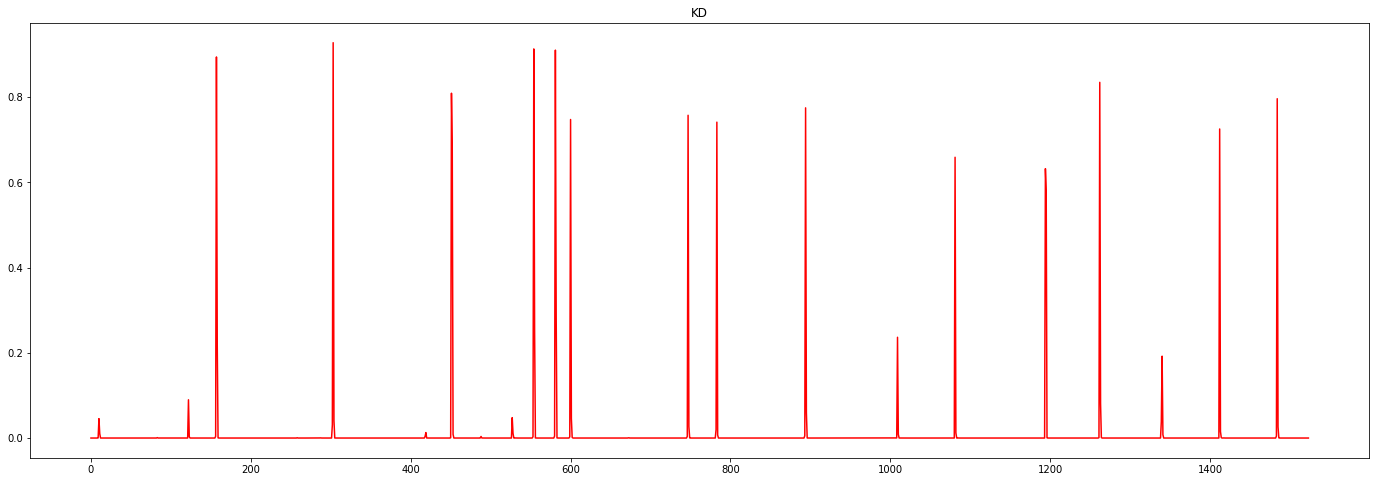

In [14]:
plot(Y_pred)

In [15]:
Y_peak = peaks(Y_pred, **config["peak_params"])

In [16]:
config["peak_params"]

{'pre_max': 3,
 'post_max': 3,
 'pre_avg': 3,
 'post_avg': 3,
 'delta': 0.05,
 'wait': 2}

In [17]:
print(Y_pred.mean())
print(Y_peak.mean())

0.014147211693678321
0.016622922134733157


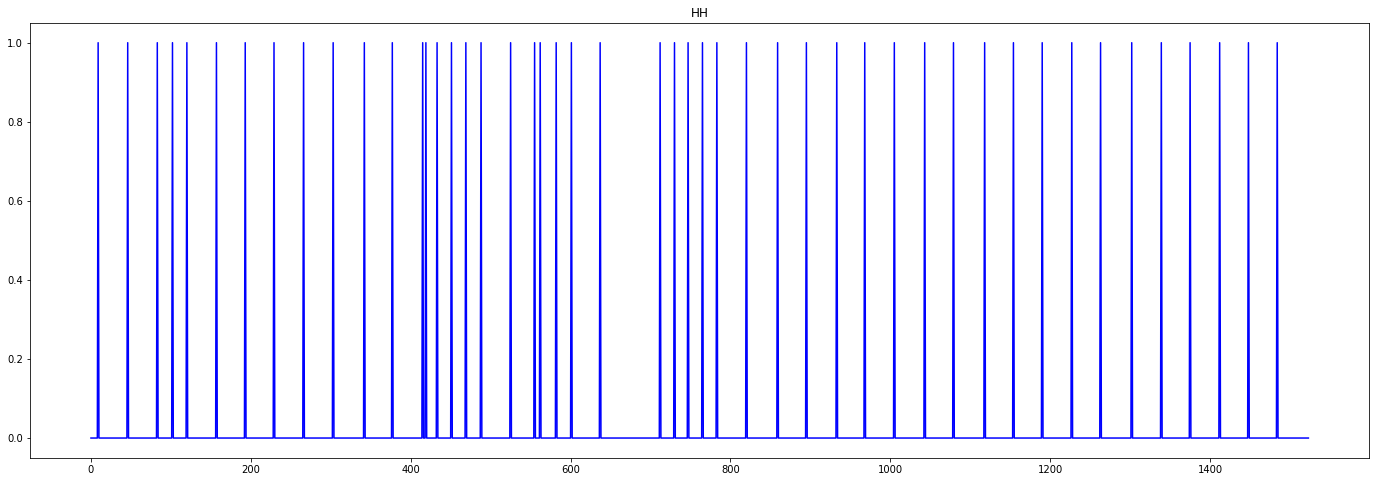

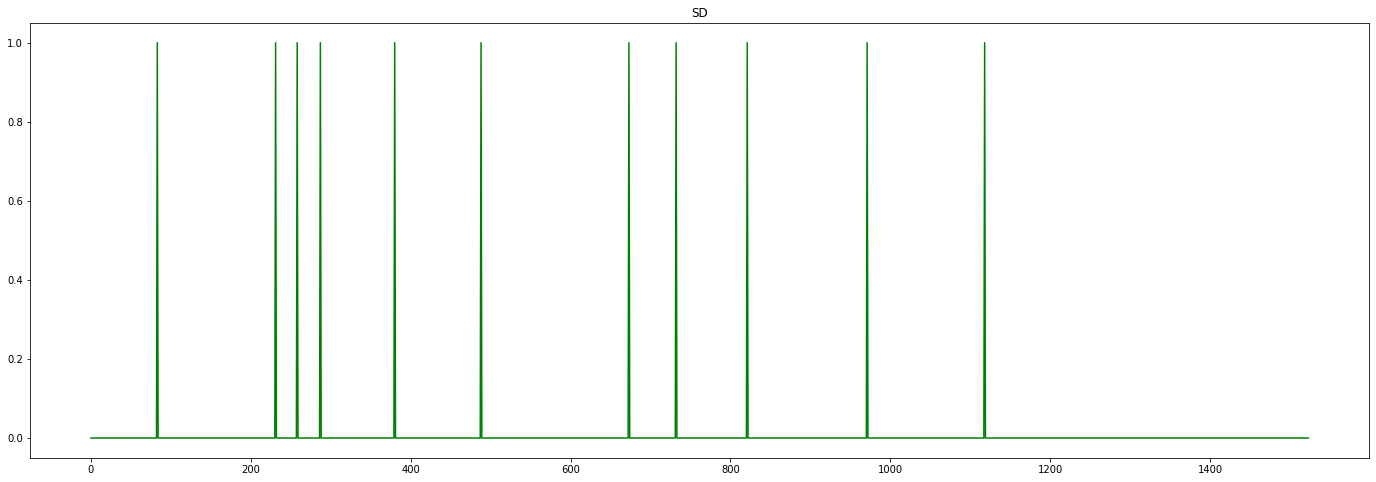

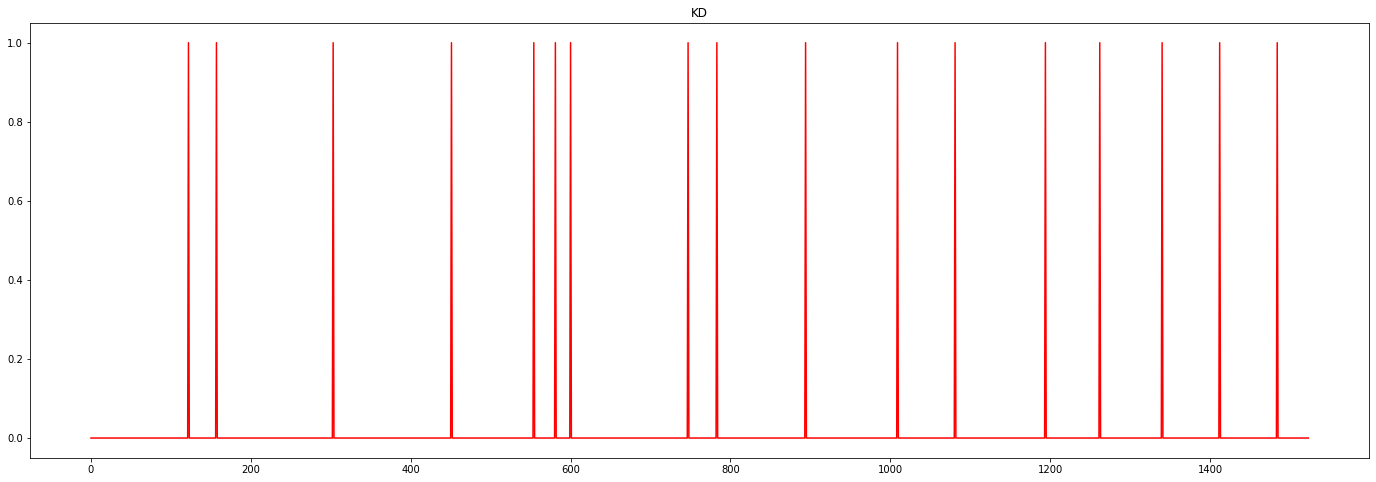

In [18]:
plot(Y_peak)

In [19]:
result = accuracies(Y_test, Y_peak, **config["metrics_params"])

In [20]:
config["metrics_params"]

{'pre_tolerance': 3, 'post_tolerance': 3}

In [21]:
result

HH  TP           45.0000
    FP            3.0000
    FN            1.0000
    TP+FP        48.0000
    TP+FN        46.0000
    Precision     0.9375
    Recall        0.9783
    F-measure     0.9574
SD  TP           11.0000
    FP            0.0000
    FN            2.0000
    TP+FP        11.0000
    TP+FN        13.0000
    Precision     1.0000
    Recall        0.8462
    F-measure     0.9167
KD  TP           17.0000
    FP            0.0000
    FN            3.0000
    TP+FP        17.0000
    TP+FN        20.0000
    Precision     1.0000
    Recall        0.8500
    F-measure     0.9189
dtype: float64

In [22]:
cat features/20191130-211656/feature_20191130-211656.log

INFO:root:./features/20191130-211656/feature_20191130-211656.log
INFO:root:{'feature_params': {'pesudo': 0}}
INFO:root:-----train-----
INFO:root:RealDrum01_11
INFO:root:(1686, 100, 1025)
INFO:root:(1686, 3)
INFO:root:RealDrum01_10
INFO:root:(1831, 100, 1025)
INFO:root:(1831, 3)
INFO:root:RealDrum01_05
INFO:root:(1450, 100, 1025)
INFO:root:(1450, 3)
INFO:root:RealDrum01_12
INFO:root:(1807, 100, 1025)
INFO:root:(1807, 3)
INFO:root:RealDrum01_00
INFO:root:(1524, 100, 1025)
INFO:root:(1524, 3)
INFO:root:RealDrum01_08
INFO:root:(1615, 100, 1025)
INFO:root:(1615, 3)
INFO:root:RealDrum01_04
INFO:root:(1405, 100, 1025)
INFO:root:(1405, 3)
INFO:root:RealDrum01_02
INFO:root:(1512, 100, 1025)
INFO:root:(1512, 3)
INFO:root:RealDrum01_19
INFO:root:(2584, 100, 1025)
INFO:root:(2584, 3)
INFO:root:RealDrum01_17
INFO:root:(696, 100, 1025)
INFO:root:(696, 3)
INFO:root:RealDrum01_09
INFO:root:(1427, 100, 1025)
INFO:root:(1427, 3)
INFO:root:RealDrum01_06
INFO:root:(1550, 100, 1025)
INFO:root:(1550, 3)
INF

In [23]:
X_train = np.load("features/20191130-211656/X_train.npy", allow_pickle=True)[()]
Y_train = np.load("features/20191130-211656/Y_train.npy", allow_pickle=True)[()]

In [24]:
def expand_dictvalues(a_dict):

    values = list(a_dict.values())

    result = values[0]
    for val in values[1:]:
        result = np.append(result, val, axis=0)

    return result

In [25]:
X_train = expand_dictvalues(X_train)
Y_train = expand_dictvalues(Y_train)

In [26]:
print(X_train.shape)
print(Y_train.shape)

(24098, 100, 1025)
(24098, 3)


In [27]:
ls


configs/  data/      eval.py     features/  logs/    train.py
cp/       eda.ipynb  feature.py  lib/       run.sh*


In [28]:
from lib.evalutil import show_spec

In [29]:
def plot_XY(X, Y):
    show_spec(X, "X")
    plot(Y)

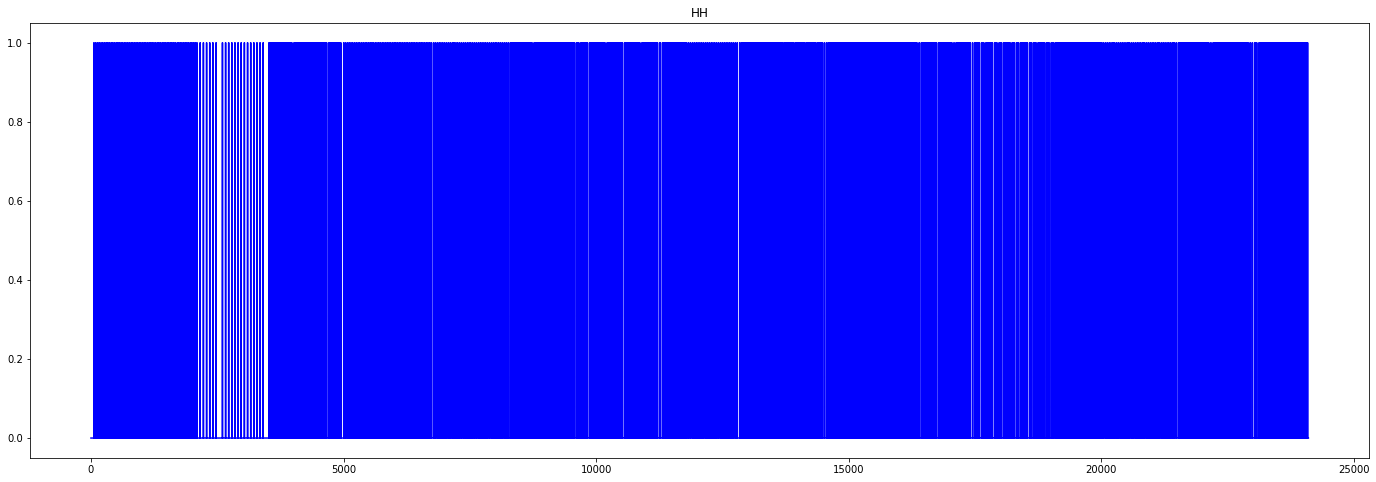

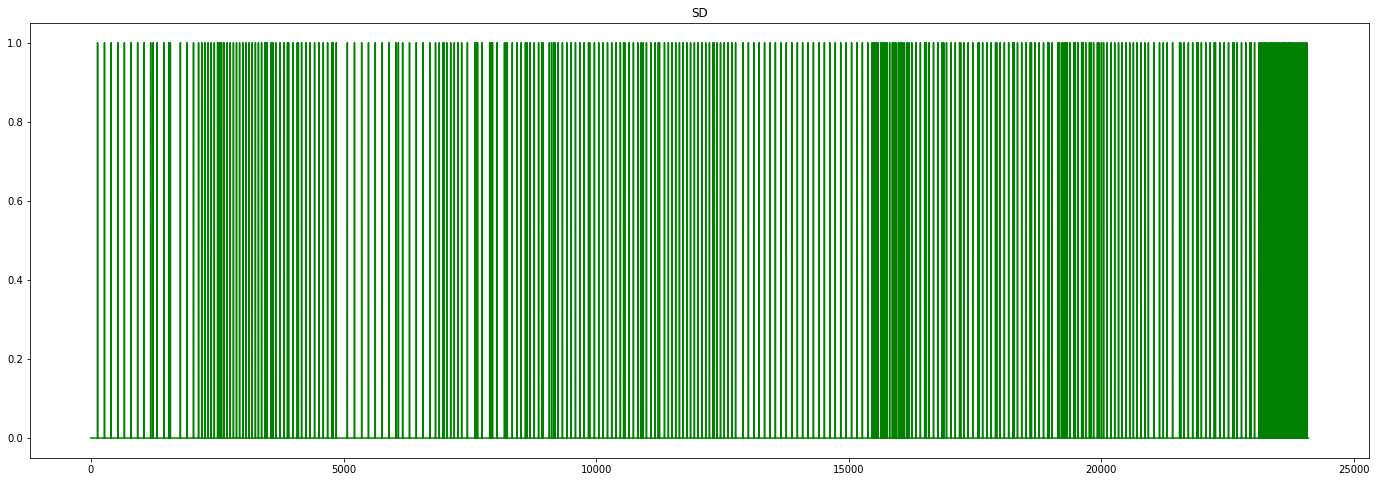

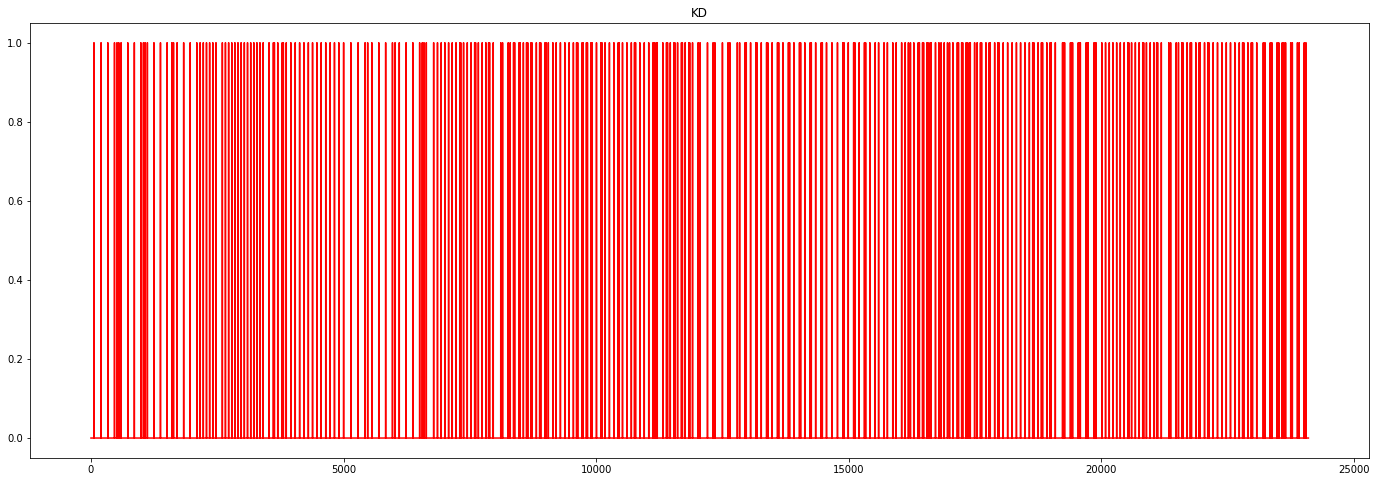

In [30]:
plot(Y_train)

In [ ]:
batch = 
plot_XY(X_train[batch], Y_train[batch])